**Práctica - Deep Learning - César Armando Cruz Mendoza**

Nota: El ejercicio fue desarrollado en equipo Mac local con Jupyter aprovechando las GPU disponibles

Inicio con la carga de datos de acuerdo a la guía compartida

In [1]:
#se realiza la descarga del dataset con información de Airbnb
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-03-17 13:03:02--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolviendo public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Conectando con public.opendatasoft.com (public.opendatasoft.com)[34.248.20.69]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [application/csv]
Grabando a: “airbnb-listings.csv”

airbnb-listings.csv     [     <=>            ]  54.31M  2.82MB/s    en 20s     

2023-03-17 13:03:24 (2.72 MB/s) - “airbnb-listings.csv” guardado [56950929]



In [2]:
#librerias a utilizar

import pandas as pd
import imageio as io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Se carga de dataset y se verifica la información
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [4]:
# Se muestra la estructura de las columnas de información disponible
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [8]:
#Se realiza la descarga de imagenes. 
#Se inició con 300
#Se incrementó a 500
#Se prueba con 850

n_images = 850
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

/var/folders/rn/0xw3kvws3835x04f9_hby75w0000gn/T/ipykernel_37980/472030520.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url)


Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 4 descargada
5
Imagen 5 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 10 descargada
9
Imagen 11 descargada
10
Imagen 12 descargada
11
Imagen 13 descargada
12
Imagen 14 descargada
13
Imagen 15 descargada
14
Imagen 16 descargada
15
Imagen 18 descargada
16
Imagen 19 descargada
17
Imagen 20 descargada
18
Imagen 21 descargada
19
Imagen 24 descargada
20
Imagen 25 descargada
21
Imagen 27 descargada
22
Imagen 33 descargada
23
Imagen 35 descargada
24
Imagen 36 descargada
25
Imagen 37 descargada
26
Imagen 41 descargada
27
Imagen 42 descargada
28
Imagen 44 descargada
29
Imagen 47 descargada
30
Imagen 48 descargada
31
Imagen 49 descargada
32
Imagen 51 descargada
33
Imagen 54 descargada
34
Imagen 57 descargada
35
Imagen 59 descargada
36
Imagen 61 descargada
37
Imagen 62 descargada
38
Imagen 64 descargada
39
Imagen 67 descargada
40
Imagen 69 descargada
41
Imagen 70 descargada
42
Imagen 72

Imagen 490 descargada
323
Imagen 491 descargada
324
Imagen 497 descargada
325
Imagen 498 descargada
326
Imagen 499 descargada
327
Imagen 501 descargada
328
Imagen 503 descargada
329
Imagen 504 descargada
330
Imagen 505 descargada
331
Imagen 506 descargada
332
Imagen 507 descargada
333
Imagen 508 descargada
334
Imagen 510 descargada
335
Imagen 511 descargada
336
Imagen 512 descargada
337
Imagen 513 descargada
338
Imagen 514 descargada
339
Imagen 517 descargada
340
Imagen 519 descargada
341
Imagen 520 descargada
342
Imagen 522 descargada
343
Imagen 523 descargada
344
Imagen 524 descargada
345
Imagen 526 descargada
346
Imagen 527 descargada
347
Imagen 528 descargada
348
Imagen 529 descargada
349
Imagen 531 descargada
350
Imagen 532 descargada
351
Imagen 537 descargada
352
Imagen 538 descargada
353
Imagen 540 descargada
354
Imagen 541 descargada
355
Imagen 545 descargada
356
Imagen 546 descargada
357
Imagen 547 descargada
358
Imagen 548 descargada
359
Imagen 549 descargada
360
Imagen 550 d

Imagen 993 descargada
639
Imagen 995 descargada
640
Imagen 997 descargada
641
Imagen 998 descargada
642
Imagen 999 descargada
643
Imagen 1001 descargada
644
Imagen 1003 descargada
645
Imagen 1007 descargada
646
Imagen 1008 descargada
647
Imagen 1009 descargada
648
Imagen 1011 descargada
649
Imagen 1015 descargada
650
Imagen 1018 descargada
651
Imagen 1019 descargada
652
Imagen 1021 descargada
653
Imagen 1023 descargada
654
Imagen 1024 descargada
655
Imagen 1026 descargada
656
Imagen 1029 descargada
657
Imagen 1031 descargada
658
Imagen 1033 descargada
659
Imagen 1034 descargada
660
Imagen 1035 descargada
661
Imagen 1036 descargada
662
Imagen 1037 descargada
663
Imagen 1040 descargada
664
Imagen 1041 descargada
665
Imagen 1042 descargada
666
Imagen 1044 descargada
667
Imagen 1046 descargada
668
Imagen 1047 descargada
669
Imagen 1048 descargada
670
Imagen 1049 descargada
671
Imagen 1050 descargada
672
Imagen 1053 descargada
673
Imagen 1054 descargada
674
Imagen 1056 descargada
675
Imagen

In [9]:
#imagenes que se descargaron
print(images.shape)

(850, 224, 224, 3)


In [10]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]

In [11]:
print(final_data.shape)

(850, 89)


In [12]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']

In [13]:
# guardamos las imágenes y datos que si tienen imágenes
np.save('images.npy', images)
np.save('final_data.npy', final_data)

In [14]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']

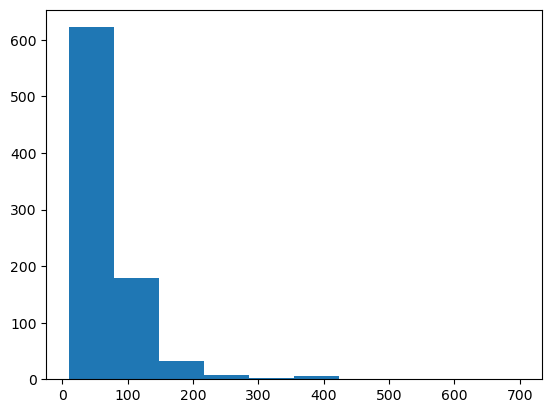

In [15]:
# mostramos un histograma de los datos disponibles
plt.hist(y_reg, bins=10)
plt.show()

In [16]:
#establecemos las tres categorias de clasificación a utilizar: barato, normal, caro

y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=100:
        y_class.append(1)
    else:
        y_class.append(2)

Nota:  Ajusté el l{imite de 150 a 100, para poder tener un poco de más datos de la clase 3 - Caro

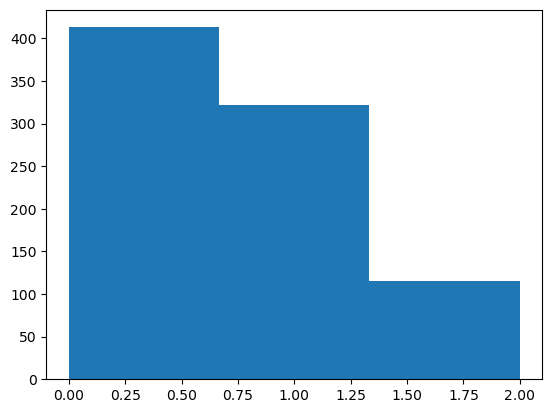

In [17]:
# analizamos como queda la distribución de los datos
plt.hist(y_class, bins=3)
plt.show()

In [18]:
#revisamos los tipos de datos disponibles

print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1335
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              850 non-null    int64  
 1   Listing Url                     850 non-null    object 
 2   Scrape ID                       850 non-null    int64  
 3   Last Scraped                    850 non-null    object 
 4   Name                            850 non-null    object 
 5   Summary                         814 non-null    object 
 6   Space                           630 non-null    object 
 7   Description                     848 non-null    object 
 8   Experiences Offered             850 non-null    object 
 9   Neighborhood Overview           519 non-null    object 
 10  Notes                           326 non-null    object 
 11  Transit                         516 non-null    object 
 12  Access                          499

In [19]:
#solo me interesa identificar las que son tipo numérico

numericos = data.select_dtypes(include=['int64', 'float64'])
print(numericos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14001 entries, 0 to 14000
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14001 non-null  int64  
 1   Scrape ID                       14001 non-null  int64  
 2   Host ID                         14001 non-null  int64  
 3   Host Response Rate              12254 non-null  float64
 4   Host Acceptance Rate            0 non-null      float64
 5   Host Listings Count             13998 non-null  float64
 6   Host Total Listings Count       13998 non-null  float64
 7   Latitude                        14001 non-null  float64
 8   Longitude                       14001 non-null  float64
 9   Accommodates                    14001 non-null  int64  
 10  Bathrooms                       13949 non-null  float64
 11  Bedrooms                        13977 non-null  float64
 12  Beds                            

De estas columnas considero utilizar las siguientes:

---  ------                          --------------  -----  
 9   Accommodates                    14001 non-null  int64
 
 10  Bathrooms                       13949 non-null  float64
 
 11  Bedrooms                        13977 non-null  float64

 12  Beds                            13952 non-null  float64
 
 19  Guests Included                 14001 non-null  int64  
 
 20  Extra People                    14001 non-null  int64  
 
 28  Number of Reviews               14001 non-null  int64  

In [20]:
#Normalizamos la información de las variables numéricas a utilizar
columnas = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Number of Reviews']

ds_numerica = final_data.loc[:, columnas]

# Utilizo la función MinMaxScaler
scaler = MinMaxScaler()

ds_numerica[columnas] = scaler.fit_transform(ds_numerica[columnas])


In [21]:
#Revisamos cómo queda la normalización de la información
ds_numerica.head(5)

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Number of Reviews
0,0.066667,0.125,0.166667,0.000000,0.000000,0.000000,0.273038
1,0.066667,0.125,0.166667,0.000000,0.000000,0.000000,0.307167
2,0.066667,0.125,0.166667,0.000000,0.000000,0.142857,0.068259
3,0.200000,0.125,0.166667,0.066667,0.066667,0.071429,0.187713
4,0.466667,0.375,0.500000,0.200000,0.333333,0.571429,0.156997


In [22]:
#incluimos 2 variables categóricas que son relevantes:  Property Type y Room Type y 
#las codificamos mediante one-hot 

columnas_cat = ["Property Type", "Room Type"]

# Aplica la codificación One-Hot a las columnas categóricas y guarda el resultado en un nuevo DataFrame
df_one_hot = pd.get_dummies(final_data[columnas_cat])

# Muestra las primeras filas del nuevo DataFrame con las columnas codificadas en One-Hot
print(df_one_hot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1335
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Property Type_Apartment        850 non-null    uint8
 1   Property Type_Bed & Breakfast  850 non-null    uint8
 2   Property Type_Casa particular  850 non-null    uint8
 3   Property Type_Chalet           850 non-null    uint8
 4   Property Type_Condominium      850 non-null    uint8
 5   Property Type_Dorm             850 non-null    uint8
 6   Property Type_Guesthouse       850 non-null    uint8
 7   Property Type_Hostel           850 non-null    uint8
 8   Property Type_House            850 non-null    uint8
 9   Property Type_Loft             850 non-null    uint8
 10  Property Type_Other            850 non-null    uint8
 11  Property Type_Townhouse        850 non-null    uint8
 12  Room Type_Entire home/apt      850 non-null    uint8
 13  Room Type_Private r

In [23]:
#unimos la información numérica y categórica

final = pd.concat([ds_numerica, df_one_hot], axis=1, join='inner')
print(final.shape)

(850, 22)


In [24]:
#el data set final con los datos numéricos y en one-hot
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 1335
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Accommodates                   850 non-null    float64
 1   Bathrooms                      847 non-null    float64
 2   Bedrooms                       847 non-null    float64
 3   Beds                           846 non-null    float64
 4   Guests Included                850 non-null    float64
 5   Extra People                   850 non-null    float64
 6   Number of Reviews              850 non-null    float64
 7   Property Type_Apartment        850 non-null    uint8  
 8   Property Type_Bed & Breakfast  850 non-null    uint8  
 9   Property Type_Casa particular  850 non-null    uint8  
 10  Property Type_Chalet           850 non-null    uint8  
 11  Property Type_Condominium      850 non-null    uint8  
 12  Property Type_Dorm             850 non-null    ui

In [25]:
#Revisamos la existencia de valores NA
final.isna().sum()

Accommodates                     0
Bathrooms                        3
Bedrooms                         3
Beds                             4
Guests Included                  0
Extra People                     0
Number of Reviews                0
Property Type_Apartment          0
Property Type_Bed & Breakfast    0
Property Type_Casa particular    0
Property Type_Chalet             0
Property Type_Condominium        0
Property Type_Dorm               0
Property Type_Guesthouse         0
Property Type_Hostel             0
Property Type_House              0
Property Type_Loft               0
Property Type_Other              0
Property Type_Townhouse          0
Room Type_Entire home/apt        0
Room Type_Private room           0
Room Type_Shared room            0
dtype: int64

In [26]:
#completamos los valores faltantes y se propone utilizar el valor medio

mean_bathrooms = final['Bathrooms'].mean()
final['Bathrooms'].fillna(mean_bathrooms, inplace=True)

mean_beds = final['Beds'].mean()
final['Beds'].fillna(mean_beds, inplace=True)

mean_bedrooms = final['Bedrooms'].mean()
final['Bedrooms'].fillna(mean_bedrooms, inplace=True)

In [27]:
#Revisamos nuevamente que no existan valores NA
final.isna().sum()

Accommodates                     0
Bathrooms                        0
Bedrooms                         0
Beds                             0
Guests Included                  0
Extra People                     0
Number of Reviews                0
Property Type_Apartment          0
Property Type_Bed & Breakfast    0
Property Type_Casa particular    0
Property Type_Chalet             0
Property Type_Condominium        0
Property Type_Dorm               0
Property Type_Guesthouse         0
Property Type_Hostel             0
Property Type_House              0
Property Type_Loft               0
Property Type_Other              0
Property Type_Townhouse          0
Room Type_Entire home/apt        0
Room Type_Private room           0
Room Type_Shared room            0
dtype: int64

**Modelo predictivo en 1D**

In [28]:
# Pasamos las etiquetas de las clases barato, normal y caro a one-hot
y_class_one_hot = to_categorical(y_class)


In [29]:
# se generan los grupos de datos para entrenamiento y prueba
# con el dataset final y las etiquetas de clasificación

X = final  
y = y_class_one_hot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Definimos el modelo de la red neuronal
# Se proponen tres capas con una activación 
# La salida softmax es para identificar los tres niveles de precio

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Metal device set to: Apple M1 Pro
Epoch 1/100


2023-03-17 13:20:39.435891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-17 13:20:39.436279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-17 13:20:39.590646: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 8/17 [=============>................] - ETA: 0s - loss: 1.1563 - accuracy: 0.1797

2023-03-17 13:20:39.894682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/17 [=========================>....] - ETA: 0s - loss: 1.1070 - accuracy: 0.2958

2023-03-17 13:20:40.224093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 25ms/step - loss: 1.0977 - accuracy: 0.3382 - val_loss: 0.9814 - val_accuracy: 0.7426
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 0.9661 - accuracy: 0.6728 - val_loss: 0.8742 - val_accuracy: 0.7353
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 0.8900 - accuracy: 0.6801 - val_loss: 0.7905 - val_accuracy: 0.7500
Epoch 4/100
17/17 [==============================] - 0s 12ms/step - loss: 0.8247 - accuracy: 0.6857 - val_loss: 0.7291 - val_accuracy: 0.7500
Epoch 5/100
17/17 [==============================] - 0s 11ms/step - loss: 0.7780 - accuracy: 0.6985 - val_loss: 0.6878 - val_accuracy: 0.7500
Epoch 6/100
17/17 [==============================] - 0s 11ms/step - loss: 0.7552 - accuracy: 0.7004 - val_loss: 0.6718 - val_accuracy: 0.7500
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 0.7365 - accuracy: 0.7022 - val_loss: 0.6622 - val_accuracy: 0.7500
Epoch 8/100
17/17 

17/17 [==============================] - 0s 9ms/step - loss: 0.6120 - accuracy: 0.7537 - val_loss: 0.6107 - val_accuracy: 0.7500
Epoch 59/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6105 - accuracy: 0.7500 - val_loss: 0.6108 - val_accuracy: 0.7647
Epoch 60/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6148 - accuracy: 0.7408 - val_loss: 0.6110 - val_accuracy: 0.7500
Epoch 61/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6094 - accuracy: 0.7482 - val_loss: 0.6069 - val_accuracy: 0.7574
Epoch 62/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6111 - accuracy: 0.7482 - val_loss: 0.6171 - val_accuracy: 0.7647
Epoch 63/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6065 - accuracy: 0.7518 - val_loss: 0.6164 - val_accuracy: 0.7647
Epoch 64/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6089 - accuracy: 0.7445 - val_loss: 0.6081 - val_accuracy: 0.7574
Epoch 65/100
17/17 

In [31]:
loss, accu = model.evaluate(X_test, y_test)
print("Exactitud:", accu)


6/6 [==============================] - 0s 34ms/step - loss: 0.6139 - accuracy: 0.7529
Exactitud: 0.7529411911964417


In [32]:
#Realizamos las predicciones con el conjunto de test

pred = model.predict(X_test)
pred_class = np.argmax(pred, axis=1)


6/6 [==============================] - 0s 4ms/step


2023-03-17 13:21:11.708183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


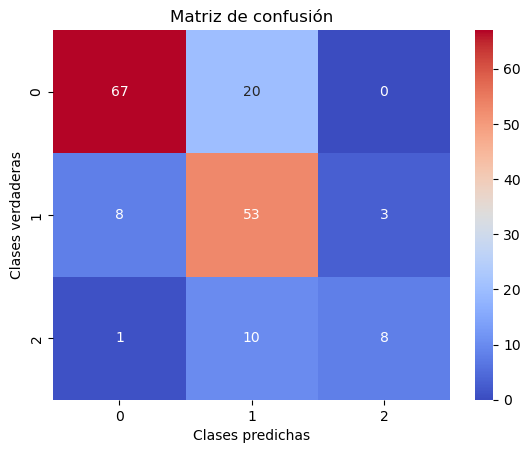

In [33]:
#generamos la matriz de confusión para evaluar resultados

etiquetas_ok = np.argmax(y_test, axis=1)

# Calcula matriz de confusión
conf_mat = confusion_matrix(etiquetas_ok, pred_class)

sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='coolwarm', 
            xticklabels=[0, 1, 2], 
            yticklabels=[0, 1, 2])

plt.xlabel('Clases predichas')
plt.ylabel('Clases verdaderas')
plt.title('Matriz de confusión')
plt.show()


**Podemos considerar que los resultados son +/- buenos**

**Modelo predictivo con imágenes**

In [34]:
#Cargamos las imágenes almacenadas

imagenes = np.load('images.npy')

In [35]:
#Se normalizan las imágenes

norm_imagenes = imagenes / 255.0

In [37]:
#Se generan los conjuntos de datos para entrenamiento y prueba

X_train, X_test, y_train, y_test = \
    train_test_split(norm_imagenes, 
                     y_class_one_hot, 
                     test_size=0.2, 
                     random_state=42, 
                     stratify=y_class)


In [38]:
#Se plantea la red convolucional

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


In [39]:
model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [40]:
#entrenamos la red estableciendo se detenga si no hay mejora después de 10 épocas

detener = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True)

#probamos con 100 éopcas, lotes de 64 y 10% de datos para validación
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=64, 
          validation_split=0.1, 
          callbacks=[detener])


Epoch 1/100


2023-03-17 13:23:29.583177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 4s 207ms/step - loss: 1.1162 - accuracy: 0.2092 - val_loss: 1.1014 - val_accuracy: 0.1618
Epoch 2/100


2023-03-17 13:23:32.766889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 133ms/step - loss: 1.1068 - accuracy: 0.2908 - val_loss: 1.0953 - val_accuracy: 0.3824
Epoch 3/100
10/10 [==============================] - 1s 122ms/step - loss: 1.0945 - accuracy: 0.3824 - val_loss: 1.0907 - val_accuracy: 0.4265
Epoch 4/100
10/10 [==============================] - 1s 124ms/step - loss: 1.0920 - accuracy: 0.3725 - val_loss: 1.0864 - val_accuracy: 0.4559
Epoch 5/100
10/10 [==============================] - 1s 153ms/step - loss: 1.0876 - accuracy: 0.4150 - val_loss: 1.0813 - val_accuracy: 0.5147
Epoch 6/100
10/10 [==============================] - 2s 166ms/step - loss: 1.0815 - accuracy: 0.4395 - val_loss: 1.0749 - val_accuracy: 0.5147
Epoch 7/100
10/10 [==============================] - 1s 133ms/step - loss: 1.0726 - accuracy: 0.4837 - val_loss: 1.0685 - val_accuracy: 0.5147
Epoch 8/100
10/10 [==============================] - 1s 122ms/step - loss: 1.0647 - accuracy: 0.4673 - val_loss: 1.0606 - val_accuracy: 0.5147
Epoch 9/100

In [41]:
model.evaluate(X_test, y_test)


6/6 [==============================] - 1s 63ms/step - loss: 1.0029 - accuracy: 0.4882


[1.002947211265564, 0.4882352948188782]

Por los resultados identifico que hace falta jugar más con algunas variantes como:

- Variar la arquitectura
- Tomar más datos
- Agregar alguna otra variable categórica
- Variar los hiperparámetros



**Modelo hibrido - Early fusion**

In [42]:
#utilizamos los datos de 

print(final.head())
print(norm_imagenes)

   Accommodates  Bathrooms  Bedrooms      Beds  Guests Included  Extra People  \
0      0.066667      0.125  0.166667  0.000000         0.000000      0.000000   
1      0.066667      0.125  0.166667  0.000000         0.000000      0.000000   
2      0.066667      0.125  0.166667  0.000000         0.000000      0.142857   
3      0.200000      0.125  0.166667  0.066667         0.066667      0.071429   
4      0.466667      0.375  0.500000  0.200000         0.333333      0.571429   

   Number of Reviews  Property Type_Apartment  Property Type_Bed & Breakfast  \
0           0.273038                        1                              0   
1           0.307167                        1                              0   
2           0.068259                        1                              0   
3           0.187713                        1                              0   
4           0.156997                        1                              0   

   Property Type_Casa particular

In [45]:
#Necesitamos ajustar los datos de las imágenes a un vector

imagenes2 = norm_imagenes.reshape(norm_imagenes.shape[0], -1)


In [46]:
# Unimos la información de 1D con las imágenes

datos_union = np.hstack((final, imagenes2))


In [47]:
# Generamos los conjuntos de datos separados
# y traemos las clases en one-hot

X_train, X_test, y_train, y_test = \
    train_test_split(datos_union, 
                     y_class_one_hot, 
                     test_size=0.2, 
                     random_state=42)


In [48]:
#La propuesta de modelo hibrido
input_shape = datos_union.shape[1]
num_classes = y_class_one_hot.shape[1]

model = Sequential([
    Dense(256, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [49]:
#Entrenamos el modelo
detener = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True)

model.fit(X_train, 
          y_train, 
          validation_split=0.2, 
          epochs=100, 
          batch_size=32, 
          callbacks=[detener])


Epoch 1/100


2023-03-17 13:26:19.747730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 54.1947 - accuracy: 0.3676

2023-03-17 13:26:21.385463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 117ms/step - loss: 54.1947 - accuracy: 0.3676 - val_loss: 23.8403 - val_accuracy: 0.4265
Epoch 2/100
17/17 [==============================] - 2s 111ms/step - loss: 30.6407 - accuracy: 0.3971 - val_loss: 8.2930 - val_accuracy: 0.4338
Epoch 3/100
17/17 [==============================] - 2s 95ms/step - loss: 18.8299 - accuracy: 0.4283 - val_loss: 6.3457 - val_accuracy: 0.4412
Epoch 4/100
17/17 [==============================] - 2s 94ms/step - loss: 14.4318 - accuracy: 0.3952 - val_loss: 5.2950 - val_accuracy: 0.4412
Epoch 5/100
17/17 [==============================] - 2s 94ms/step - loss: 11.4033 - accuracy: 0.4007 - val_loss: 4.8835 - val_accuracy: 0.4118
Epoch 6/100
17/17 [==============================] - 2s 95ms/step - loss: 10.0033 - accuracy: 0.3676 - val_loss: 1.5321 - val_accuracy: 0.4338
Epoch 7/100
17/17 [==============================] - 2s 94ms/step - loss: 3.2266 - accuracy: 0.3750 - val_loss: 1.0737 - val_accuracy: 0.4632
Epoch 8/1

In [50]:
# Revisamos resultados

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


6/6 [==============================] - 0s 59ms/step - loss: 0.9637 - accuracy: 0.5118
Loss: 0.9637367129325867
Accuracy: 0.5117647051811218
